# Load and Visualize FashionMNIST
* The first step in any classification problem is to look at the
dataset you are working with. This will give you some details about the format
of images and labels, as well as some insight into how you might approach
defining a network to recognize patterns in such an image set.


### Load the data
#### Dataset class and Tensors
torch.uitls.data.Dataset is an abstract class representing a dataset.
The FashionMNIST class is an extension of this Dataset class and it allows
us to:
* 1: load batches of image / label data;
* 2: uniformly apply transformations to our data, such as turning all our images
into Ternsor's for training a nn.

In [28]:
# our basic libraries
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir(r'C:\Users\atavares\PycharmProjects\ComputerVision')

# data loading and transforming
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms



# The output of torchvision dataset are PILimage images of range [0, 1]
# We transform them to Tersors for input into a CNN

## Define a transform to read the data in as ternsor
data_transform = transforms.ToTensor()

# choose the training and test datasets
train_data = FashionMNIST(root='./data', train=True, download=False,
                          transform=data_transform)
# Print out some stats about the training data
print(f'Train data, number of images: { len(train_data)}')

Train data, number of images: 60000


### Data iteration and batching
We'll use torch.utils.data.DataLoader, which is an iterator that allows
us to batch and shuffle data.

In [29]:
# prepare data loaders, set the batch_size

batch_size= 20
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# specify the image classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Visualize some training data
This cell iterates over the training dataset, loading a random batch of image
label data, using dataiter.next(). It then plots the batch of images and labels
in a 2x 2 batch_size.2 grid.

<ipython-input-30-dba3a1c97338>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])


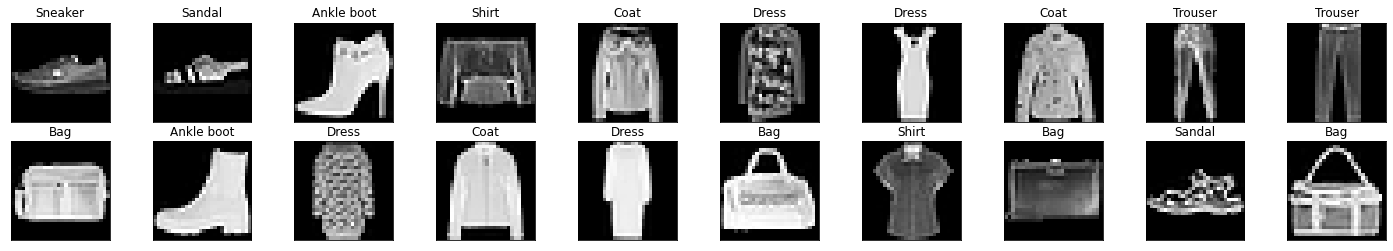

In [30]:
%matplotlib inline

# Obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(classes[labels[idx]])

### View an image in more detail
Each image in this dataset is a 28x28 pixel, normalized, grayscale image.

### A note on normalization
Normalization ensures that, as we go through a feedforward and then backpropagation
step in training our CNN, that each image feature will fall within a similar range
of values and not overly activate any particular layer in our network. During the
feedfoward step, a network takes in an input image and multiplies each input pixel
by some convolutional filter weights (and adds biases!), then it applies some
activation and pooling functions. Without normalization, it's much more likely that
the calculated gradients in the backpropagation step will be quite large and
cause our loss to increase instead of converge.


teste


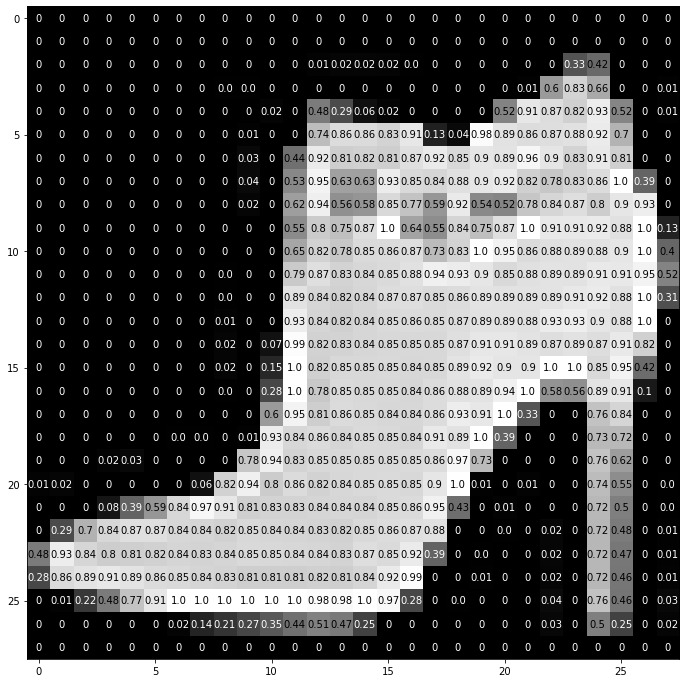

In [31]:
# select an image by index
idx = 2
img = np.squeeze(images[idx])

# display the pixel values in that image
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')